In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #fix the loading of the dataset, without this it's unable to run

In [ ]:
batch_size = 64
num_classes = 10
learning_rate = 0.001 #alpha
num_epochs = 10

In [ ]:
train_dataset = torchvision.datasets.MNIST(root = './data',
                                               train = True,
                                               transform = transforms.Compose([
                                                      transforms.Resize((32,32)),
                                                      transforms.ToTensor(),
                                                      transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                               download = True)
    
    
test_dataset = torchvision.datasets.MNIST(root = './data',
                                              train = False,
                                              transform = transforms.Compose([
                                                      transforms.Resize((32,32)),
                                                      transforms.ToTensor(),
                                                      transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                              download=True)
    
    
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                               batch_size = batch_size,
                                               shuffle = True)
    
    
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                               batch_size = batch_size,
                                               shuffle = True)



In [ ]:
class LeNet5(nn.Module):
    def __init__(self,num_classes):
        super(LeNet5,self).__init__()
        self.layer1 = nn.Sequential(
                nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
                nn.BatchNorm2d(6),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
                nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
                nn.BatchNorm2d(16),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [17]:
model = LeNet5(num_classes)
cost = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
total_step = len(train_loader)

In [18]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
            images = images
            labels = labels
            
            outputs = model(images)
            loss = cost(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if (i+1) % 400 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/10], Step [400/938], Loss: 0.1665
Epoch [1/10], Step [800/938], Loss: 0.0321
Epoch [2/10], Step [400/938], Loss: 0.0943
Epoch [2/10], Step [800/938], Loss: 0.1124
Epoch [3/10], Step [400/938], Loss: 0.0457
Epoch [3/10], Step [800/938], Loss: 0.0489
Epoch [4/10], Step [400/938], Loss: 0.0527
Epoch [4/10], Step [800/938], Loss: 0.0642
Epoch [5/10], Step [400/938], Loss: 0.0033
Epoch [5/10], Step [800/938], Loss: 0.1544
Epoch [6/10], Step [400/938], Loss: 0.0098
Epoch [6/10], Step [800/938], Loss: 0.0047
Epoch [7/10], Step [400/938], Loss: 0.0017
Epoch [7/10], Step [800/938], Loss: 0.0195
Epoch [8/10], Step [400/938], Loss: 0.0238
Epoch [8/10], Step [800/938], Loss: 0.0038
Epoch [9/10], Step [400/938], Loss: 0.0014
Epoch [9/10], Step [800/938], Loss: 0.0011
Epoch [10/10], Step [400/938], Loss: 0.0597
Epoch [10/10], Step [800/938], Loss: 0.0002


In [33]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
            images = images
            labels = labels
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 98.64 %


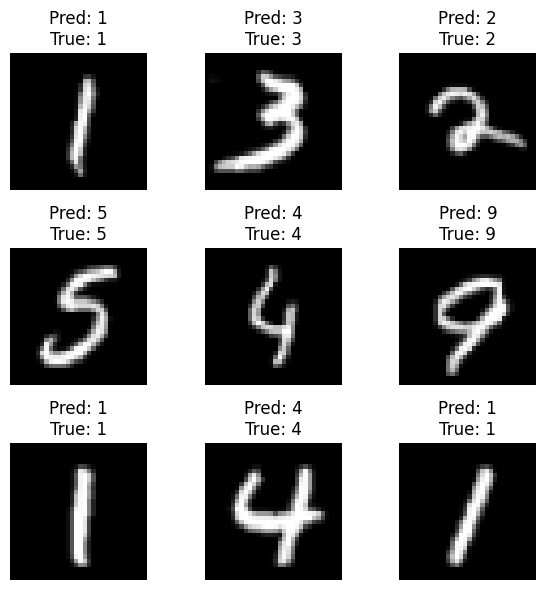

In [37]:
def display_test_images(num_images, rows):
    cols = num_images // rows
    if num_images % rows != 0:
        cols += 1
   
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    axes = axes.flatten() if rows > 1 else axes
    
    for i in range(min(num_images, len(images))):
        img = images[i][0].numpy()
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Pred: {predicted[i]}\nTrue: {labels[i]}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

display_test_images(9, 3)